In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import os
import shutil

In [ ]:
Pdirectory = '/content/drive/My Drive/Picture/Poisonous'
Edirectory = '/content/drive/My Drive/Picture/Eatable'
prefix = 'Poisonous'
Eprefix = 'Edible'

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
files = os.listdir(Pdirectory)

In [ ]:
for file in files:
   # Construct the file path
        file_path = os.path.join(Pdirectory, file)

        # Load the image using PIL
        img = load_img(file_path)

        # Convert the image to a NumPy array
        x = img_to_array(img)

        # Reshape the array to have an additional dimension of size 1 at the beginning
        x = x.reshape((1,) + x.shape)

        # Use the datagen.flow() method to generate augmented images and save them to the 'preview' directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/Picture/TranPoisonous', save_prefix=prefix, save_format='jpeg'):
            i += 1
            if i > 20:
                break

In [ ]:
Efiles = os.listdir(Edirectory)

In [ ]:
for file in Efiles:
   # Construct the file path
        file_path = os.path.join(Edirectory, file)

        # Load the image using PIL
        img = load_img(file_path)

        # Convert the image to a NumPy array
        x = img_to_array(img)

        # Reshape the array to have an additional dimension of size 1 at the beginning
        x = x.reshape((1,) + x.shape)

        # Use the datagen.flow() method to generate augmented images and save them to the 'preview' directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/Picture/TranEdible', save_prefix=Eprefix, save_format='jpeg'):
            i += 1
            if i > 20:
                break

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Poriginal_dir = '/content/drive/My Drive/Picture/TranPoisonous'
Eoriginal_dir = '/content/drive/My Drive/Picture/TranEdible'

In [ ]:
Pall_filenames = os.listdir(Poriginal_dir)
Eall_filenames = os.listdir(Eoriginal_dir)

In [ ]:
Ptrain_filenames, Ptest_filenames = train_test_split(Pall_filenames, test_size=0.2, random_state=42)
Etrain_filenames, Etest_filenames = train_test_split(Eall_filenames, test_size=0.2, random_state=42)

In [ ]:
Ptrain_dir = '/content/drive/My Drive/Picture/Train/Poisonous'
Ptest_dir = '/content/drive/My Drive/Picture/Test/Poisonous'
Etrain_dir = '/content/drive/My Drive/Picture/Train/Edible'
Etest_dir = '/content/drive/My Drive/Picture/Test/Edible'

In [ ]:

for filename in Ptrain_filenames:
    src = os.path.join(Poriginal_dir, filename)
    dst = os.path.join(Ptrain_dir, filename)
    shutil.copy(src, dst)


In [ ]:
    
for filename in Ptest_filenames:
    src = os.path.join(Poriginal_dir, filename)
    dst = os.path.join(Ptest_dir, filename)
    shutil.copy(src, dst)


In [ ]:
for filename in Etrain_filenames:
    src = os.path.join(Eoriginal_dir, filename)
    dst = os.path.join(Etrain_dir, filename)
    shutil.copy(src, dst)


In [ ]:
for filename in Etest_filenames:
    src = os.path.join(Eoriginal_dir, filename)
    dst = os.path.join(Etest_dir, filename)
    shutil.copy(src, dst)

In [ ]:
TrainCount=0
TestCount=0
for filename in Ptrain_filenames:
    TrainCount+=1
for filename in Ptest_filenames:
    TestCount+=1
for filename in Etrain_filenames:
    TrainCount+=1
for filename in Etest_filenames:
    TestCount+=1
print("Test:",TestCount)
print("Train:",TrainCount)

Test: 1122
Train: 4482


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
img_width, img_height = 150, 150

train_data_dir = '/content/drive/My Drive/Picture/Train'
test_data_dir = '/content/drive/My Drive/Picture/Test'
nb_train_samples = TrainCount
nb_test_samples = TestCount
#below can change to improve
epochs = 50 # the model will be trained for a total of 50 passes over the entire training dataset.
batch_size = 16 # which means that during each iteration of training, the model will process and update its weights based on 16 samples from the training dataset.

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
def cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  return model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 4482 images belonging to 2 classes.
Found 1122 images belonging to 2 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/50
280/280 [==============================] - 328s 1s/step - loss: 0.6998 - accuracy: 0.5658 - val_loss: 0.6578 - val_accuracy: 0.6071
Epoch 2/50
280/280 [==============================] - 308s 1s/step - loss: 0.6580 - accuracy: 0.6218 - val_loss: 0.6438 - val_accuracy: 0.6313
Epoch 3/50
280/280 [==============================] - 318s 1s/step - loss: 0.6313 - accuracy: 0.6514 - val_loss: 0.6022 - val_accuracy: 0.6759
Epoch 4/50
280/280 [==============================] - 316s 1s/step - loss: 0.6043 - accuracy: 0.6767 - val_loss: 0.5741 - val_accuracy: 0.6884
Epoch 5/50
280/280 [==============================] - 319s 1s/step - loss: 0.5787 - accuracy: 0.7004 - val_loss: 0.5286 - val_accuracy: 0.7286
Epoch 6/50
280/280 [==============================] - 314s 1s/step - loss: 0.5581 - accuracy: 0.7127 - val_loss: 0.6018 - val_accuracy: 0.6696
Epoch 7/50
280/280 [==============================] - 315s 1s/step - loss: 0.5294 - accuracy: 0.7342 - val_loss: 0.4784 - val_accuracy: 0.7536

In [ ]:
model.save_weights('first_try.h5')

In [ ]:
model = cnn_model()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.layers import Dense

In [ ]:
import pickle
with open('/content/drive/My Drive/history', 'wb') as f:
        pickle.dump(history.history, f)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sb.set() # set the default Seaborn style for graphics

In [ ]:
all=pd.DataFrame(history.history)
loss=pd.DataFrame(history.history['loss'])
accuracy=pd.DataFrame(history.history['accuracy'])
vl=pd.DataFrame(history.history['val_loss'])
va=pd.DataFrame(history.history['val_accuracy'])
all.head()

,loss,accuracy,val_loss,val_accuracy
0,0.699820,0.565831,0.657754,0.607143
1,0.658047,0.621809,0.643795,0.631250
2,0.631314,0.651366,0.602206,0.675893
3,0.604292,0.676668,0.574121,0.688393
4,0.578666,0.700403,0.528598,0.728571


In [ ]:
print("The max index of val_accuracy",history.history['val_accuracy'].index(max(history.history['val_accuracy'])))
print("The max index of accuracy",history.history['accuracy'].index(max(history.history['accuracy'])))

The max index of val_accuracy 44
The max index of accuracy 45


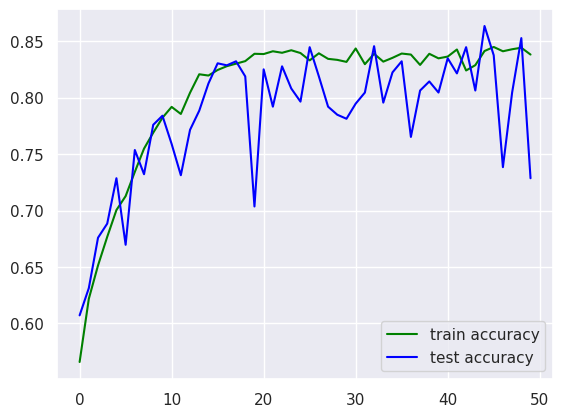

In [ ]:
# load the model training history
with open("/content/drive/My Drive/history", "rb") as f:
    hist = pickle.load(f)
    
plt.plot(hist["accuracy"], label = "train accuracy", color = "green")
plt.plot(hist["val_accuracy"], label = "test accuracy", color = "blue")
plt.legend()
plt.savefig("/content/drive/My Drive/training_history.png")
plt.show()


In [256]:
def predict_and_draw(i, X, y, model, save = False):
    x = X[i]
    x = x.astype(np.uint8)
    plt.imshow(x)
    #x = x/ 255.0
    x.shape = (1, ) + x.shape
    p = model.predict(x)
    plt.title("P(Poisonous): " + str(p) + " Actually edible: " + str(y[i]))
    if(save):
        plt.savefig("/content/drive/My Drive/prediction_example.jpg")
    plt.show()

In [ ]:
from keras.models import model_from_json

json_file = open('/content/drive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("first_try.h5")

1/1 [==============================] - 0s 47ms/step


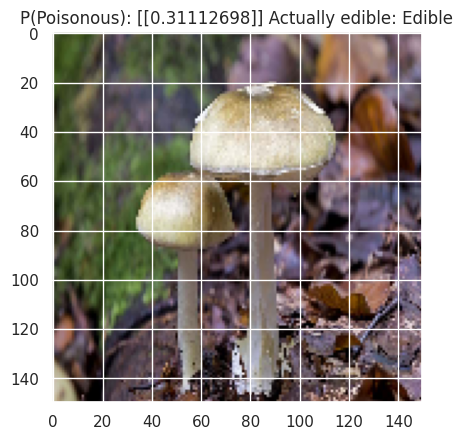

In [270]:
import tensorflow as tf
from skimage import io
TPpredict='/content/drive/My Drive/testPicture/Poisonous'
TEpredict='/content/drive/My Drive/testPicture/Edible'
Pimages = os.listdir(TPpredict)
Eimages = os.listdir(TEpredict)
lables = ['Edible','Poisonous']
img_dic=[]
X = []
y = []
#mushroom_imgs= Pimages + Eimages
#mushroom_info = mushroom_imgs.merge(mushroom_classes, how = "right", on = "name_latin")
for image in Pimages:
  y.append(lables[1])
  #X.append(image)
  '''
  img = plt.imread(TPpredict+'/'+image)
  resize_image = tf.image.resize(img, [150, 150])
  resize_image = tf.expand_dims(resize_image, axis=0)
  img_dic.append(resize_image)'''
  file_path=TPpredict+'/'+image
  img = load_img(file_path)
  resize_image = tf.image.resize(img, [150, 150])
  # Convert the image to a NumPy array
  x = img_to_array(resize_image)
  # Reshape the array to have an additional dimension of size 1 at the beginning
  #x = x.reshape((1,) + x.shape)
  img_dic.append(x)


for image in Eimages:
  y.append(lables[0])
  #X.append(image)
  #img_dic.append(image)
  file_path=TEpredict+'/'+image
  img = load_img(file_path)
  resize_image = tf.image.resize(img, [150, 150])
  # Convert the image to a NumPy array
  x = img_to_array(resize_image)
  # Reshape the array to have an additional dimension of size 1 at the beginning
  #x = x.reshape((1,) + x.shape)
  img_dic.append(x)
  
for i in range(len(img_dic)):
  X.append(img_dic[i])
'''
for i in range(len(X)):
  x = X[i]
  print(i," picture:")
  t=model.predict(x)#[0,0].round(2)
  print("P(Edible): ",t," Actually edible: " ,y[i])'''

predict_and_draw(13, X = X, y = y, model = loaded_model, save = True)